# Correlation Coefficients and Graphs

For Target Varaible (DEP_DELAY) only. Trying to understand dep_delay's distribution and skewness and how to imporve it before training the model

In [33]:
# import modules 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline 

In [34]:
df = pd.read_csv('../../cleaning-preprocessing/cleaned_flight_data_with_target.csv')
df.head(5)

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,CRS_ARR_M,Temperature,Dew Point,Humidity,...,Condition_Light Snow / Windy,Condition_Mostly Cloudy,Condition_Mostly Cloudy / Windy,Condition_Partly Cloudy,Condition_Partly Cloudy / Windy,Condition_Rain,Condition_Rain / Windy,Condition_Snow,Condition_Wintry Mix,Condition_Wintry Mix / Windy
0,11,1,5,124,636,324,448,48,34,58,...,False,False,False,False,False,False,False,False,False,False
1,11,1,5,371,2475,340,531,48,34,58,...,False,False,False,False,False,False,False,False,False,False
2,11,1,5,181,1069,301,482,48,34,58,...,False,False,False,False,False,False,False,False,False,False
3,11,1,5,168,944,345,513,48,34,58,...,False,False,False,False,False,False,False,False,False,False
4,11,1,5,139,760,360,499,46,32,58,...,False,False,False,False,False,False,False,False,False,False


### Removing Outilers

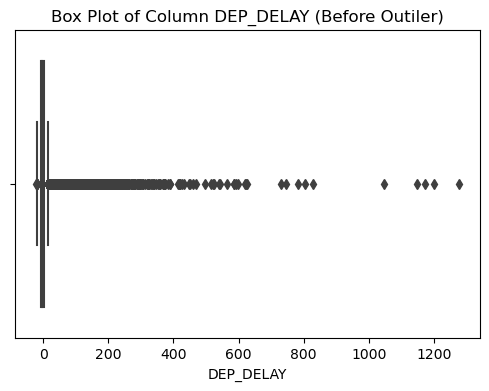

In [35]:
# BoxPlot Before Removing Outilers
plt.figure(figsize=(6,4))
sns.boxplot(x=df['DEP_DELAY'])
plt.title("Box Plot of Column DEP_DELAY (Before Outiler)")
plt.show()

In [36]:
# Compute IQR
Q1 = df['DEP_DELAY'].quantile(0.25)
Q3 = df['DEP_DELAY'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 6 * IQR
upper_bound = Q3 + 6 * IQR

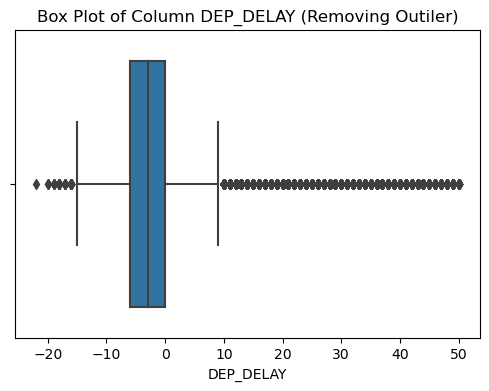

In [37]:
# Filter out outliers
df = df[(df['DEP_DELAY'] >= lower_bound) & (df['DEP_DELAY'] <= upper_bound)]

# print(df.info())

plt.figure(figsize=(6,4))
sns.boxplot(x=df['DEP_DELAY'])
plt.title("Box Plot of Column DEP_DELAY (Removing Outiler)")
plt.show()

In [38]:
# Considering any flight is delay after 15 minutes
df = df[df['DEP_DELAY'] >= 15]

### Transformations (Log or Sqrt)

In [39]:
print(df['DEP_DELAY'].skew())  # If > 0.5 or < -0.5, transformation is needed

df['DEP_DELAY_shifted'] = df['DEP_DELAY'] - df['DEP_DELAY'].min() + 1

df['DEP_DELAY_log'] = np.log1p(df['DEP_DELAY_shifted'])  # log1p avoids log(0) issue
print(df['DEP_DELAY_log'].skew())

df['DEP_DELAY_sqrt'] = np.sqrt(df['DEP_DELAY_shifted']) # sqrt version 
print(df['DEP_DELAY_sqrt'].skew())

0.5611183971669516
-0.48592102778105367
0.015474111166977098


/Users/engineererjojo/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/engineererjojo/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/engineererjojo/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Square Root Transformed')

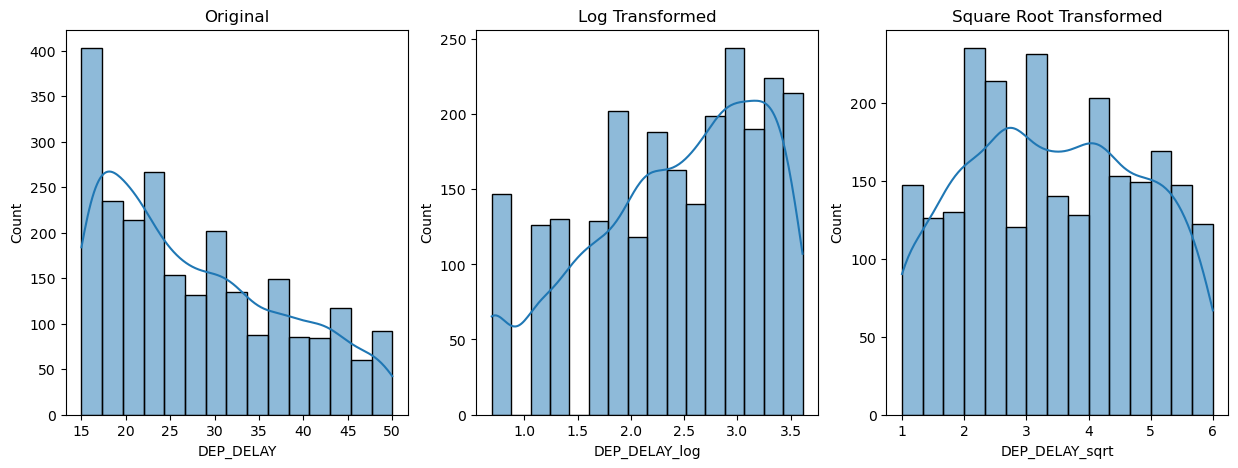

In [40]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(df['DEP_DELAY'], kde=True, ax=axes[0])
axes[0].set_title('Original')

sns.histplot(df['DEP_DELAY_log'], kde=True, ax=axes[1])
axes[1].set_title('Log Transformed')

sns.histplot(df['DEP_DELAY_sqrt'], kde=True, ax=axes[2])
axes[2].set_title('Square Root Transformed')

### Conclusion 

After viewing the skewness score and distribution, using sqrt transformation has the best potenial return the most optimal result